# __Code Graveyard__

## Concave Hull Test

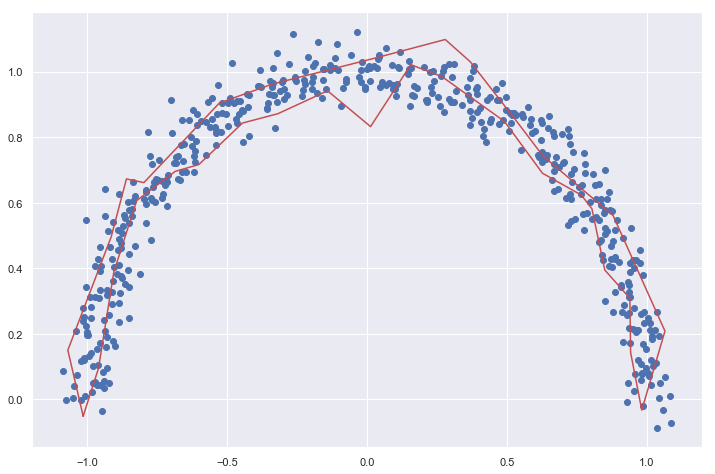

In [189]:
XY, labels =  datasets.make_moons(100, 8, 0.05)
points = XY[labels==0]

concave_hull = ConcaveHull(points)

# Calculate the concave hull array
hull_array = concave_hull.calculate(5)

_ = plt.plot(*moon.T, 'o')
_ = plt.plot(*hull_array.T, 'r-')

## Applying DBSCAN

In [5]:
%matplotlib widget
sns.set(rc={'figure.figsize':(6,6)})

(0.6951561008242889, 0.002424250715831411)

Estimated number of clusters: 96
Estimated number of noise points: 3722
Total number of points: 89939


FigureCanvasNbAgg()

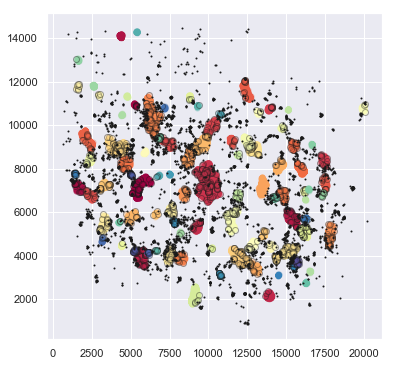

In [8]:
XY = np.column_stack((df['x [nm]'],df['y [nm]']))[::10]

db = DBSCAN(eps=147, min_samples=73, n_jobs=6)
custom_silhouette(db,XY,cv=2)
dbscan_verbose(db, XY, plot=True)

## RipleyK test

In [ ]:
from astropy.stats import RipleysKEstimator
labels = db.labels_
z = XY[labels==0] / 1000

Kest = RipleysKEstimator(area=4, x_max=6.4, y_max=7.7, x_min=5, y_min=6.6)

r = np.linspace(0, 2, 100)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
plt.plot(r, Kest(data=z, radii=r, mode='none'), color='red', ls='--',
         label=r'$K_{un}$')
plt.plot(r, Kest(data=z, radii=r, mode='translation'), color='black',
         label=r'$K_{trans}$')
# plt.plot(r, Kest(data=z, radii=r, mode='ohser'), color='blue', ls='-.',
#          label=r'$K_{ohser}$')
# plt.plot(r, Kest(data=z, radii=r, mode='var-width'), color='green',
#          label=r'$K_{var-width}$')
# plt.plot(r, Kest(data=z, radii=r, mode='ripley'), color='yellow',
#          label=r'$K_{ripley}$')

plt.legend()

In [ ]:
dbscan_verbose(db, XY, plot=True,n=[0])

## Sparse neighbor distance matrix

Try this again next time and throw into DBSCAN to see if performance improves

In [39]:
from sklearn.neighbors import radius_neighbors_graph

coords = np.column_stack((df['x [nm]'],df['y [nm]']))[::50]

test = radius_neighbors_graph(X=coords, radius=200, mode='distance')
test.todense()

384208785.9220097

In [40]:
dbscan = DBSCAN(n_jobs=6,metric='precomputed',eps=1000,min_samples=5)

param_dist = {"eps": randint(120, 200),
              "min_samples": randint(30, 300)}

def custom_silhouette2(dbscan,X):
    db = dbscan.fit(X)
    labels = db.labels_
    score = silhouette_score(X.todense().T, labels, metric="precomputed")
    
    return score

custom_silhouette2(dbscan,test)

-0.9919946631087392

Estimated number of clusters: 97
Estimated number of noise points: 436
Total number of points: 17988


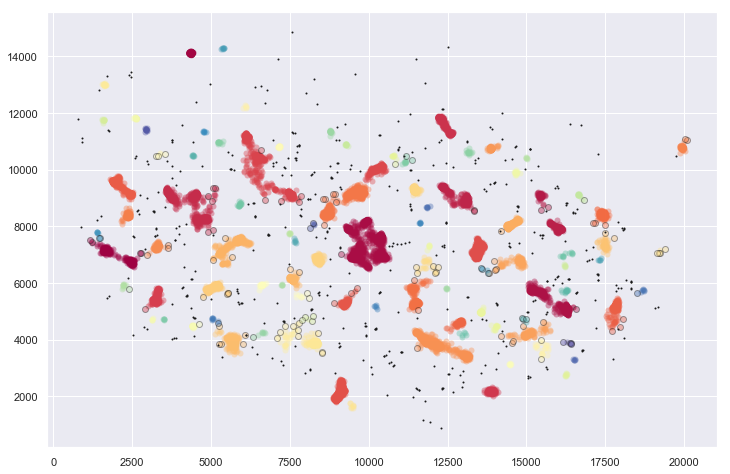

In [36]:
dbscan_verbose(dbscan, coords, plot=True)

## Hyper Parameter Search

In [ ]:
dbscan = DBSCAN(n_jobs=6)

param_dist = {"eps": randint(120, 200),
              "min_samples": randint(30, 300)}
    
results = random_search_custom(dbscan,param_dist,XY,n=200,cv=3)
results

## Performance of sampling

In [54]:
%%timeit
XY = df[['x [nm]', 'y [nm]']].sample(frac=0.2, random_state=1234).values

34.7 ms ± 631 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%%timeit
XY = np.column_stack((df['x [nm]'],df['y [nm]']))[::5]

8.84 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%timeit
XY = df[['x [nm]', 'y [nm]']].values[np.random.rand(df.shape[0]) < 0.2]

23.6 ms ± 489 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Loading Data

In [3]:
df = pd.read_csv('Diskovery_Cell1_ThunderSTORM.csv')
df.head()

,id,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],uncertainty [nm]
0,1.0,1.0,2474.998618,6736.088180,195.815722,1841.965445,80.087915,10.501425,9.781846
1,2.0,1.0,4356.136836,14133.322371,145.009192,5599.702004,82.962749,24.851702,4.184589
2,3.0,1.0,4542.775300,9091.265025,121.313419,221.442108,39.507939,4.162599,15.045367
3,4.0,1.0,5977.444344,7594.973438,137.276419,155.518749,39.499220,4.681645,24.730111
4,5.0,1.0,6079.459555,11231.168432,137.261612,2693.631410,59.415820,11.278048,4.647010


## Displaying Raw Data

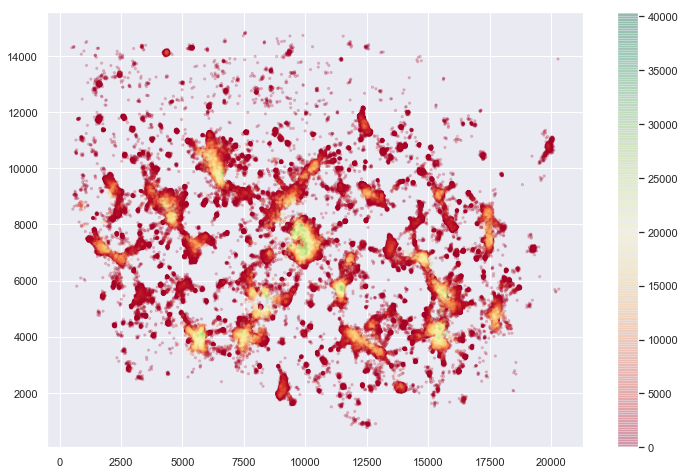

In [14]:
df = df.sort_values(by=['intensity [photon]'])
img = plt.scatter(df['x [nm]'],
                  df['y [nm]'],
                  c=df['intensity [photon]'],
                  s=5, cmap='RdYlGn',alpha=0.2)
_ = plt.colorbar(img)
plt.savefig('Python_reconstruction.png', bbox_inches='tight')

## HDBSCAN

In [24]:
XY = df[['x [nm]', 'y [nm]']].sample(frac=0.2, random_state=1).values

param_dist = {"min_cluster_size": randint(800, 1100),
              "min_samples": randint(600, 900)} # "alpha": np.round(np.linspace(0.1,2,100),2)
    
results = random_search_custom_hdb(param_dist,XY,n=2000)
results.head(10)

100%|███████████████████████████████████| 1987/1987 [14:46:54<00:00, 26.94s/it]


,score,min_cluster_size,min_samples
319,0.437,1089,629
831,0.437,1090,629
1579,0.437,1052,629
769,0.437,1056,631
1130,0.437,1066,631
1962,0.437,1059,611
508,0.437,1096,629
1577,0.437,1030,629
327,0.437,1073,611
1706,0.437,1032,631


In [ ]:
# results = pd.read_csv('Hyper-param-search3.csv')
results.plot.scatter('min_cluster_size', 'min_samples', c='score', cmap='RdYlGn')

In [4]:
XY = df[['x [nm]', 'y [nm]']].sample(200000, random_state=1).values
hdb = hdbscan.HDBSCAN(core_dist_n_jobs=6,min_cluster_size=1090,
                      min_samples=629,gen_min_span_tree=True)
_ = hdb.fit(XY)
# hdb.relative_validity_

## Test on Crop region

In [28]:
test = df[['x [nm]', 'y [nm]']]
mask = df['x [nm]'].between(9000,12000) & df['y [nm]'].between(6000,9000)
XY = test[mask].values

XY.shape

param_dist = {"min_cluster_size": randint(5, 10000),
              "min_samples": randint(5, 1000)} # "alpha": np.round(np.linspace(0.1,2,100),2)
    
results = random_search_custom_hdb(param_dist,XY,n=10000)
results.head(10)

(68986, 2)

100%|███████████████████████████████████| 9990/9990 [23:22:41<00:00,  8.65s/it]


,score,min_cluster_size,min_samples
8112,0.664,572,21
8328,0.664,585,27
1578,0.651,1836,59
4084,0.650,1520,51
6757,0.650,1930,88
8534,0.650,1840,88
4218,0.650,1816,56
1465,0.650,1990,32
7262,0.649,1668,55
6600,0.649,2125,102


## Functions

In [ ]:
        
def custom_silhouette(dbscan,X,cv=1):
    scores = []
    for i in range(cv):
        samples = np.random.choice(np.arange(len(X)),10000)
        xy = X[samples]
        xydist = cdist(xy,xy)
        db = dbscan.fit(X)
        labels = db.labels_[samples]
        scores.append(silhouette_score(xydist, labels, metric="precomputed"))
    score = np.mean(scores)
    stdev = np.std(scores)
    if cv > 1:
        return score,stdev
    
    return score

###############################################################################
###############################################################################

def random_search_custom(dbscan,param_dist,X,n=1,cv=5):
    allparams = list(ParameterSampler(param_dist,n))
    unique = list(set(frozenset(x.items()) for x in allparams))
    params = [dict(x) for x in unique]
    results = []
    for i in trange(len(params)):
        dbscan.set_params(**params[i])
        if cv == 1:
            params[i]['score'] = custom_silhouette(dbscan,X,cv=cv)
            roll = 1
        else:
            params[i]['score'],params[i]['stdev'] = custom_silhouette(dbscan,X,cv=cv)
            roll = 2
        results.append(params[i])
        
    results = pd.DataFrame(results)
    results.sort_values(by=['score'],ascending=False,inplace=True)
    results = results[np.roll(results.columns.values,roll)]
    
    return results

###############################################################################
###############################################################################
        
def plot_clusters(X,labels,core,n=None,silent=False):
    if n is not None:
        mask = np.isin(labels,n)
        X,labels,core = X[mask],labels[mask],core[mask]
        
    plotlabel = None
    unique_labels = set(labels)
    colors = [plt.cm.tab20(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        cluster = (labels == k)
        alpha = 0.4
        ms = 6
        if k == -1:
            col = [0, 0, 0, 1]
            alpha = 1
            ms = 1
        if n is not None:
            plotlabel = str(k)
            if not silent:
                print(f'Cluster index: {k}')
                print(f'Estimated number of points: {np.sum(cluster)}')
                print(f'Estimated number of core points: {np.sum(cluster & core)}')
                print(f'Estimated number of edge points: {np.sum(cluster & ~core)}\n')

        xy = X[cluster & core]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgewidth=0.0, markersize=ms, alpha=alpha,
                 label=plotlabel)

        xy = X[cluster & ~core]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=ms, alpha=alpha)

    if n is not None:
        plt.legend()

###############################################################################
###############################################################################

def dbscan_verbose(db, X, plot=False,n=None,p=None,silent=False):
    plt.close()
    labels = np.copy(db.labels_)
    core = np.zeros_like(labels, dtype=bool)
    try:
        core[db.core_sample_indices_] = True
    except:
        core[:] = True
        
    if p is not None:
        lower_lim = (db.probabilities_ <= p)
        for i in list(set(labels))[:-1]:
            clust = (labels == i)
            labels[clust & lower_lim] = -1

    if n is None:
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print(f'Estimated number of clusters: {n_clusters_}')
        print(f'Estimated number of noise points: {n_noise_}')
        print(f'Total number of points: {len(labels)}')
    
    if plot:
        plot_clusters(X,labels,core,n,silent)
